In [40]:
import pandas as pd

In [41]:
books = pd.read_csv("/Users/naomigong/Coding/Book_Recommender/books.csv")
print(books.isnull().sum())
#print(books.nunique(axis = 1)) #unique values per row
#print(books.nunique(axis = 0))
books["categories"].value_counts() #value count -- counts the frequency of unique values

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64


categories
Fiction                      2588
Juvenile Fiction              538
Biography & Autobiography     401
History                       264
Literary Criticism            166
                             ... 
Paris (France)                  1
Autonomy (Psychology).          1
Bombings                        1
India                           1
Mysticism                       1
Name: count, Length: 567, dtype: int64

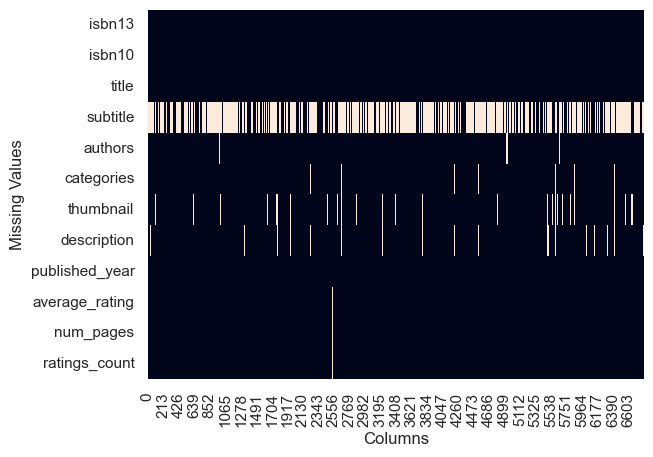

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots() #fig is figure object (whole canvas) , ax is where plot is drawn

#books.isna() return true if missing else false
#.transpose , flips the rows and columns
#ax = ax just plots on our axes
sns.heatmap(books.isna().transpose(), cbar = False, ax = ax)
plt.xlabel("Columns")
plt.ylabel("Missing Values")
plt.show()

Doing a Bias Check 

are books with missing description more likely to be shorter? or older?

In [43]:
import numpy as np
books["missing_description"] = np.where(books["description"].isna(), 1, 0) #if missing put 1, else 0
books["age_of_book"] = 2025 - books["published_year"]

Text(0.5, 1.0, 'Correlation')

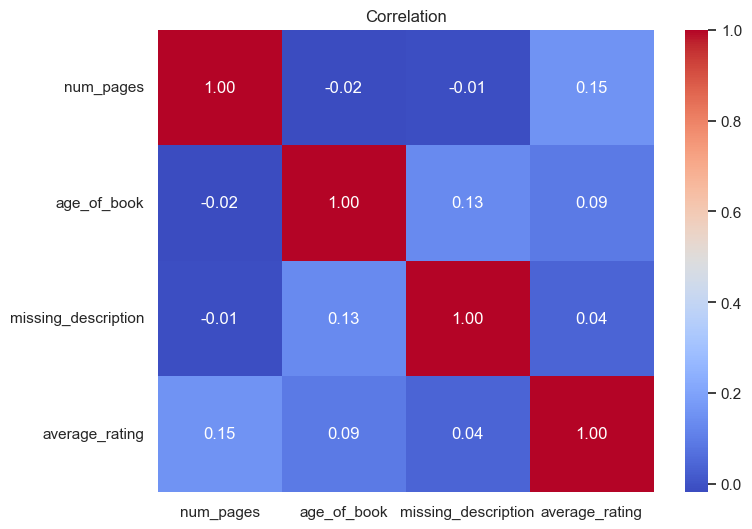

In [44]:
col_interest = ["num_pages", "age_of_book", "missing_description", "average_rating"]
correlation_matrix = books[col_interest].corr(method = "spearman")
sns.set_theme(style = "white")
plt.figure(figsize=(8,6))
#annot puts the correlation in the box
heat_map = sns.heatmap(correlation_matrix,annot=True, fmt = ".2f", cmap = "coolwarm")
heat_map.set_title("Correlation")

We want to know if any of these variables have high correlation with missing description. For example, if shorter books tend to have missing description. We can see that there isnt much correlation

- we can likely just delete the ones with missing description

In [58]:
missing = books[(books["description"].isna()) | 
      (books["num_pages"].isna()) |
       (books["average_rating"].isna()) |
        (books["published_year"].isna())
]

books_missing = books.dropna(subset=["description", "num_pages", "average_rating", "published_year"])
books_missing.shape


(6507, 14)

The categories filled has a lot different categories, can we clean this?

In [59]:
#reset index just puts it back in dataframe
books_missing["categories"].value_counts().reset_index().sort_values("count", ascending = False)
for category, counts in books["categories"].value_counts().items():
    if counts <= 10:
        #get the categories column for all in which the category = category
        books.loc[books["categories"] == category, "categories"] = "Other"

books_missing.head(10)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Other,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Other,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,Other,http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,48.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,Other,http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,Other,http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0


We want the description to be meaningful...otherwise we can't make good descriptions

(array([3.868e+03, 1.143e+03, 6.320e+02, 4.410e+02, 2.240e+02, 9.700e+01,
        5.200e+01, 2.200e+01, 1.100e+01, 1.000e+01, 2.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,  46.95,  92.9 , 138.85, 184.8 , 230.75, 276.7 , 322.65,
        368.6 , 414.55, 460.5 , 506.45, 552.4 , 598.35, 644.3 , 690.25,
        736.2 , 782.15, 828.1 , 874.05, 920.  ]),
 <BarContainer object of 20 artists>)

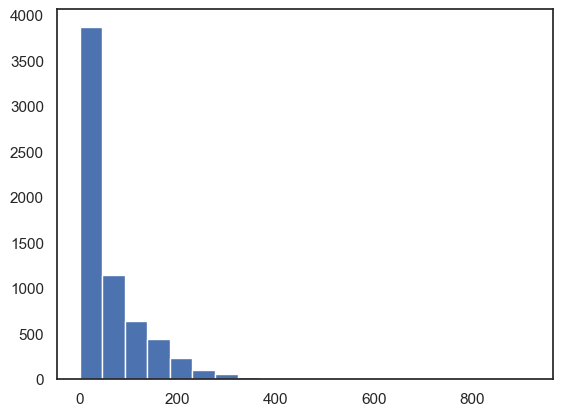

In [ ]:
#one way to check for meaningful description is length
books_missing["words_in_description"] = books_missing["description"].str.split().str.len()
books_missing.head(10)

plt.hist(books_missing["words_in_description"], bins = 20)

In [ ]:
books_missing.loc[(books_missing["words_in_description"] >= 20),  "description"]
#extract rows in which the word_in_description column is greater than 20
books_missing_25_words = books_missing[(books_missing["words_in_description"] >= 20)]

books_missing_25_words["title_and_subtitle"] = (
    np.where(books_missing_25_words["subtitle"].isna(), books_missing_25_words["title"],
             books_missing_25_words[["title", "subtitle"]].astype(str).agg(": ".join, axis = 1))
)
#selects title and subtile + converts to string incase of NA values
#.agg applies function on axis, axis = 1 is row wise (across columns)
#and join together as new string

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Other,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Other,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0,245


In [79]:
#create a tagged description
books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis =1)
books_missing_25_words.head(10)

/var/folders/f4/_5js21356_g8zx61755lqs1m0000gn/T/ipykernel_59121/1648554304.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing_25_words["tagged_description"] = books_missing_25_words[["isbn13", "description"]].astype(str).agg(" ".join, axis =1)


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,9780002005883 A NOVEL THAT READERS and critics...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,9780002261982 A new 'Christie for Christmas' -...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,"9780006178736 A memorable, mesmerizing heroine..."
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Other,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,9780006280897 Lewis' work on the nature of lov...
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Other,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,"9780006280934 ""In The Problem of Pain, C.S. Le..."
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,Other,http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80,9780006380832 Until Vasco da Gama discovered t...
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,Other,http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160,9780006470229 A new-cover reissue of the fourt...
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0,30,9780006472612 Kate Blackwell is an enigma and ...
12,9780006482079,0006482074,Warhost of Vastmark,NaN,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,0,30.0,136,9780006482079 Tricked once more by his wily ha...
13,9780006483014,0006483011,The Once and Future King,NaN,Terence Hanbury White,Other,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,2805.0,0,29.0,46,9780006483014 An omnibus volume of the author'...


In [83]:
books_missing_25_words.drop(["subtitle", "missing_description", "age_of_book", "words_in_description"], axis = 1).to_csv("books_cleaned.csv", index = False)